In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../data/raw/reviews_trust.csv')
data.head()

,Commentaire,star,date,client,reponse,source,company,ville,maj,date_commande,ecart
0,"Bonjour , Ca doit faire 5 ans environ que je s...",1,2021-06-20 00:00:00+00:00,AUDREY Du 62,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
1,Vente lacoste article manquant photo prise sur...,1,2021-06-20 00:00:00+00:00,Nanasky De Verteuil,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
2,"Vente Lacoste Honteuse , article erroné , arti...",1,2021-06-19 00:00:00+00:00,Vanessa L,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
3,J'ai commandé des mules de la marque Moosefiel...,2,2021-06-19 00:00:00+00:00,Valery PERRAULT,"Bonjour , Je suis sincèrement navré d'apprendr...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
4,Commande téléphone etat A+ . Livraison d un vi...,1,2021-06-19 00:00:00+00:00,JULIE DRINGENBERG,"Bonjour Julie , Je suis sincèrement désolé de ...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN


# Kinjal - Taux de commentaires par note & Preprocessing


In [4]:
data_kinjal = data.copy()

In [5]:
# nombre de lignes et colonnes
print(data_kinjal.shape)
print('--------------------')

# type de variables ,null /non-null
print(data_kinjal[['Commentaire', 'star']].dtypes)
print("\n")
print(data_kinjal.info())


(19863, 11)
--------------------
Commentaire    object
star            int64
dtype: object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19863 entries, 0 to 19862
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Commentaire    19834 non-null  object 
 1   star           19863 non-null  int64  
 2   date           19488 non-null  object 
 3   client         10215 non-null  object 
 4   reponse        8477 non-null   object 
 5   source         19863 non-null  object 
 6   company        19863 non-null  object 
 7   ville          4860 non-null   object 
 8   maj            5 non-null      object 
 9   date_commande  6686 non-null   object 
 10  ecart          6686 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 1.7+ MB
None


In [6]:
total = len(data_kinjal)
non_null = data_kinjal['Commentaire'].notna().sum()
null_count = data_kinjal['Commentaire'].isna().sum()
print(f"\nTotal lignes : {total}")
print(f"Comments non nulles : {non_null} ({non_null/total*100:.1f}%)")
print(f"Comments manquantes : {null_count} ({null_count/total*100:.1f}%)")


Total lignes : 19863
Comments non nulles : 19834 (99.9%)
Comments manquantes : 29 (0.1%)


In [7]:

print(f"Value counts:\n{data_kinjal['star'].value_counts()}\n")
print(f"Missing values: {data_kinjal['star'].isnull().sum()}\n")
print(f"Descriptive statistics:\n{data_kinjal['star'].describe()}\n")

Value counts:
star
5    7980
1    5122
4    3705
3    1747
2    1309
Name: count, dtype: int64

Missing values: 0

Descriptive statistics:
count    19863.000000
mean         3.408398
std          1.650531
min          1.000000
25%          1.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: star, dtype: float64



In [8]:
# Percentage distribution
print(data_kinjal['star'].value_counts(normalize=True) * 100)

star
5    40.175200
1    25.786638
4    18.652771
3     8.795247
2     6.590142
Name: proportion, dtype: float64


In [9]:

#remplacer les chaînes vides par NaN pour les considérer comme "pas de commentaire"

data_kinjal['Commentaire'] = data['Commentaire'].replace('', pd.NA)

#Calculate taux de commentaires par note
data_kinjal["has_comment"] = data_kinjal['Commentaire'].notna()

comment_rate_by_star = data_kinjal.groupby('star')['has_comment'].mean() * 100
comment_rate_by_star = comment_rate_by_star.reset_index(name='taux_commentaires')

print(comment_rate_by_star)

   star  taux_commentaires
0     1          99.746193
1     2         100.000000
2     3          99.828277
3     4          99.865047
4     5          99.899749


In [10]:
# explication statistique
print(comment_rate_by_star.describe())

           star  taux_commentaires
count  5.000000           5.000000
mean   3.000000          99.867853
std    1.581139           0.093348
min    1.000000          99.746193
25%    2.000000          99.828277
50%    3.000000          99.865047
75%    4.000000          99.899749
max    5.000000         100.000000


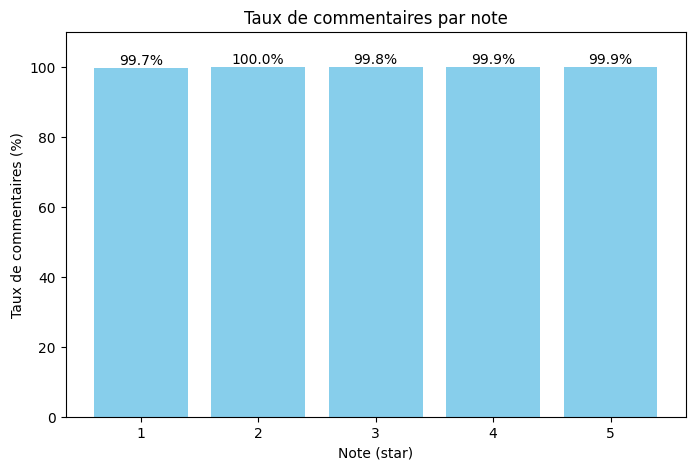

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.bar(
    comment_rate_by_star['star'].astype(str),   # x-axis
    comment_rate_by_star['taux_commentaires'],  # y-axis
    color='skyblue'
)

plt.xlabel('Note (star)')
plt.ylabel('Taux de commentaires (%)')
plt.title('Taux de commentaires par note')
plt.ylim(0, 110)

for i, v in enumerate(comment_rate_by_star['taux_commentaires']):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.show()
# Ce graphique montre  presque 100% des clients laissent un commentaire.. Il n'y a pas de différence majeure selon la note par étoiles -
# les clients laissant des notes basses (1) ou élevées (5) ajoutent presque toujours un commentaire.

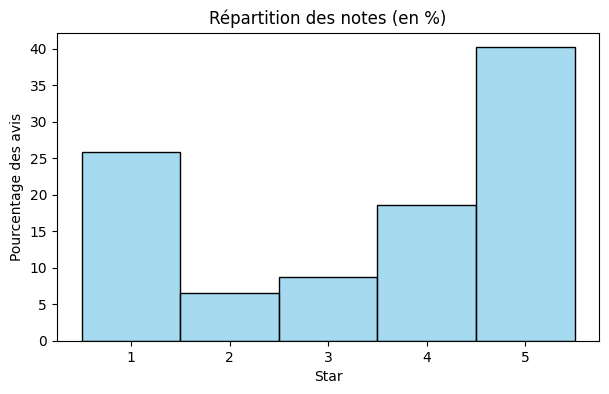

In [12]:
import seaborn as sns
plt.figure(figsize=(7,4))

sns.histplot(data=data_kinjal, x='star', discrete=True, stat='percent',
             color='skyblue', edgecolor='black')
plt.title("Répartition des notes (en %)")
plt.xlabel("Star")
plt.ylabel("Pourcentage des avis")
plt.xticks([1,2,3,4,5])
plt.show()
#Ce graphique montre clairement la proportion de chaque note : utile pour détecter un biais extrême.

<Axes: xlabel='star', ylabel='Count'>

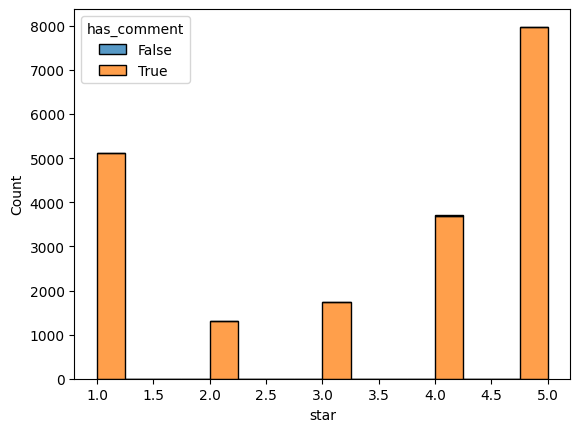

In [13]:
data_kinjal['has_comment'] = data_kinjal['Commentaire'].notnull()
sns.histplot(data=data_kinjal, x='star', hue='has_comment', multiple='stack')
# ce graph montre que presque tous les avis contiennet des commentaires

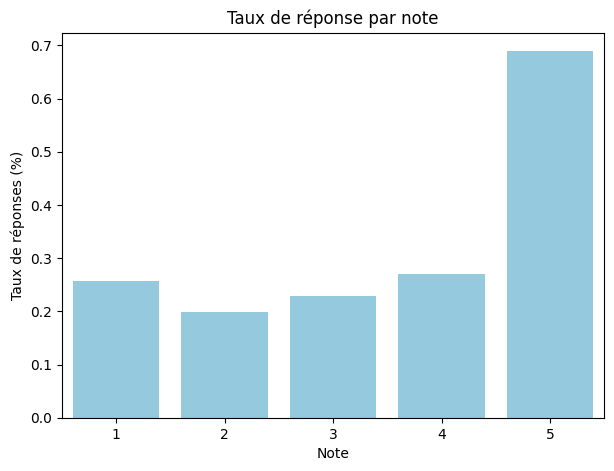

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
data_kinjal['has_response'] = data_kinjal['reponse'].notnull()
response_rate = data_kinjal.groupby('star')['has_response'].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(x='star', y='has_response', data=response_rate, color='skyblue')
plt.title("Taux de réponse par note")
plt.xlabel("Note")
plt.ylabel("Taux de réponses (%)")
plt.show()

In [15]:
# check result
data_kinjal.head(5)

,Commentaire,star,date,client,reponse,source,company,ville,maj,date_commande,ecart,has_comment,has_response
0,"Bonjour , Ca doit faire 5 ans environ que je s...",1,2021-06-20 00:00:00+00:00,AUDREY Du 62,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN,True,False
1,Vente lacoste article manquant photo prise sur...,1,2021-06-20 00:00:00+00:00,Nanasky De Verteuil,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN,True,False
2,"Vente Lacoste Honteuse , article erroné , arti...",1,2021-06-19 00:00:00+00:00,Vanessa L,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN,True,False
3,J'ai commandé des mules de la marque Moosefiel...,2,2021-06-19 00:00:00+00:00,Valery PERRAULT,"Bonjour , Je suis sincèrement navré d'apprendr...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN,True,True
4,Commande téléphone etat A+ . Livraison d un vi...,1,2021-06-19 00:00:00+00:00,JULIE DRINGENBERG,"Bonjour Julie , Je suis sincèrement désolé de ...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN,True,True


In [16]:
# Preprocessing
data_kinjal['has_comment'] = (data_kinjal['Commentaire'].str.strip() != "").astype(int)
data_kinjal['has_response'] = (data_kinjal['reponse'].str.strip() != "").astype(int)
data_kinjal['has_comment'].head(5) # pour svaoir si un avis ou une reponse est présent.

0    1
1    1
2    1
3    1
4    1
Name: has_comment, dtype: int64

In [17]:
# Nettoyage texte simple(clean_text)
#nettoyé les commentaires : minuscules, suppression d’URLs, d’e-mails et des caractères non désirés.
import re
import numpy as np

def simple_cleantext(s):
    s = str(s).lower()
    s = re.sub(r"http\S+|www\S+","", s)   # supprimer les URL
    s = re.sub(r"\S+@\S+","", s)          # supprimer les emails
    s = re.sub(r"[^a-zàâçéèêëîïôûùüÿñæœ0-9\s'-]", " ", s)  # conserver les lettres/chiffres
    s = re.sub(r"\s+", " ", s).strip() # Supprimer espaces multiples
    return s

data_kinjal['comment_clean'] = data_kinjal['Commentaire'].apply(simple_cleantext)
data_kinjal['comment_clean']

0        bonjour ca doit faire 5 ans environ que je sui...
1        vente lacoste article manquant photo prise sur...
2        vente lacoste honteuse article erroné article ...
3        j'ai commandé des mules de la marque moosefiel...
4        commande téléphone etat a livraison d un vieux...
                               ...                        
19858                                      pas de probleme
19859    cliente depuis 2008 sans encombre jusqu ' à ju...
19860    je ne sais pas si vp cherche à vendre ou à fai...
19861    je suis client sur ce site depuis plusieurs an...
19862    j'ai achetée une offre photobox via le site ve...
Name: comment_clean, Length: 19863, dtype: object

In [18]:
#Supprimer les commentaires avec ≤ 3 mots
data_kinjal['word_count'] = data_kinjal['comment_clean'].apply(lambda x: len(str(x).split()))
data_kinjal = data_kinjal[data_kinjal['word_count'] > 3]
print("Taille après suppression :", data_kinjal.shape)

Taille après suppression : (16270, 15)


In [19]:
#Lemmatisation avec SpaCy (français)
# tokenisé le text & lemmatisé chaque token
!pip install spacy
!python -m spacy download fr_core_news_md
import spacy
nlp = spacy.load("fr_core_news_md")
#lemmatiser le commentaire
def lemmatize_text(text):
    doc = nlp(text)
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop and len(token) > 3
    ]
    return " ".join(tokens)



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 MB 50.0 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_md')


In [20]:
data_kinjal['lemmatized_comment'] = data_kinjal['comment_clean'].apply(lemmatize_text)
data_kinjal['lemmatized_comment'].head(5)

0    bonjour faire membre showroopriv jamais souci ...
1    vente lacost article manquant photo prendre ar...
2    vente lacost honteux article erroné article ma...
3    commander mule marque moosefield déçu produit ...
4    commande téléphon etat livraison vieux télépho...
Name: lemmatized_comment, dtype: object

In [21]:
#liste de stopwords française de NLTK pour ignorer les mots vides (le, la, de...)
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

french_stopwords = stopwords.words('french')
print("Nombre de mots vides français :", len(french_stopwords))
print(french_stopwords[:20])

Nombre de mots vides français : 157
['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur']


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/laurine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

# Download French stopwords
nltk.download('stopwords')
french_stopwords = stopwords.words('french')

# TF-IDF Vectorisation
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words=french_stopwords
)

X_text = tfidf.fit_transform(data_kinjal['lemmatized_comment'])
print("TF-IDF shape:", X_text.shape)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/laurine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TF-IDF shape: (16270, 5000)


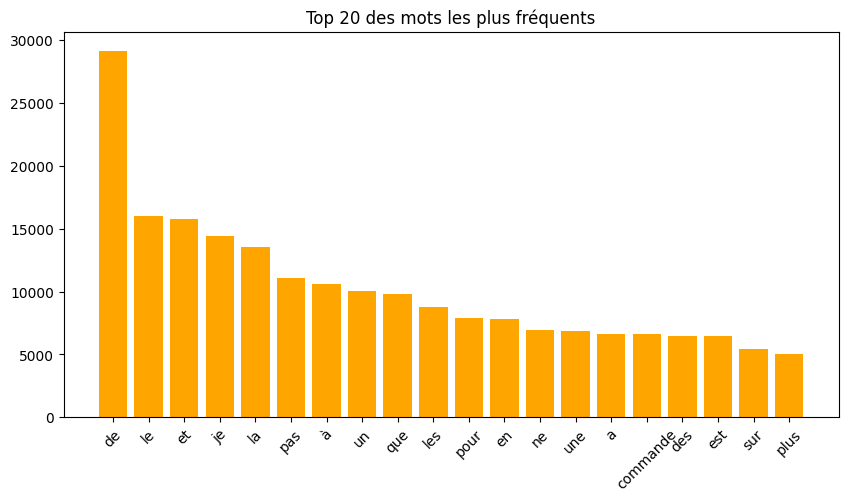

In [23]:
# Les mots les plus fréquents(Montre quels termes apparaissent le plus souvent dans les avis.)
# ce graphb indiquant la nécessité de supprimer les stopwords pour mieux cibler les mots porteurs de sens.

from collections import Counter
mots = " ".join(data_kinjal['comment_clean']).split()
mots_communs = Counter(mots).most_common(20)

plt.figure(figsize=(10,5))
plt.bar([m for m, _ in mots_communs], [c for _, c in mots_communs], color='orange')
plt.xticks(rotation=45)
plt.title("Top 20 des mots les plus fréquents")
plt.show()

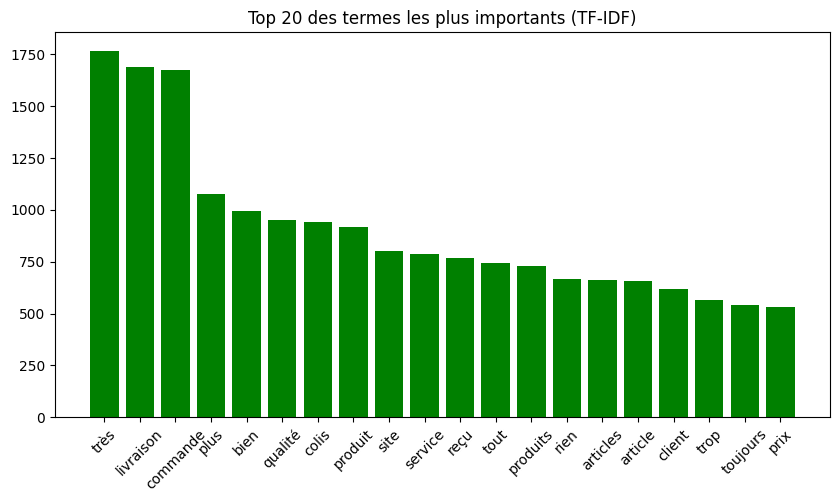

In [24]:
#Termes les plus importants selon TF-IDF(Après vectorisation (TF-IDF), on peut voir quels mots discriminent le plus les avis)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=50, stop_words=french_stopwords)
X_tfidf = vectorizer.fit_transform(data_kinjal['comment_clean'])

# Récupérer les termes
mots = vectorizer.get_feature_names_out()
somme = X_tfidf.sum(axis=0).A1
classement = sorted(list(zip(somme, mots)), reverse=True)[:20]

plt.figure(figsize=(10,5))
plt.bar([m for _, m in classement], [s for s, _ in classement], color='green')
plt.xticks(rotation=45)
plt.title("Top 20 des termes les plus importants (TF-IDF)")
plt.show()


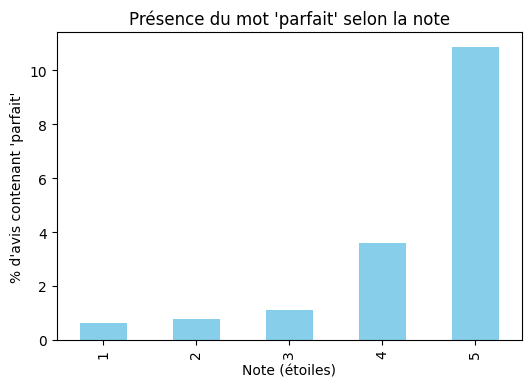

In [25]:
#Mots associés aux notes(Vérifier si certains mots sont utilisés plus souvent dans les avis 1 ou 5.)
data_kinjal['mention_rapide'] = data_kinjal['comment_clean'].str.contains("parfait").astype(int)
freq_rapide = data_kinjal.groupby('star')['mention_rapide'].mean() * 100

freq_rapide.plot(kind='bar', color='skyblue', figsize=(6,4))
plt.ylabel("% d'avis contenant 'parfait'")
plt.xlabel("Note (étoiles)")
plt.title("Présence du mot 'parfait' selon la note")
plt.show()

In [26]:
# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fr.300.bin.gz
# !gunzip cc.fr.300.bin.gz

--2025-10-22 19:29:35--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fr.300.bin.gz
18.164.52.45, 18.164.52.25, 18.164.52.20, ...icfiles.com)... 
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.164.52.45|:443... connected.
200 OKequest sent, awaiting response... 
Length: 4496886212 (4.2G) [application/octet-stream]
Saving to: ‘cc.fr.300.bin.gz’

cc.fr.300.bin.gz    100%[===================>]   4.19G  48.8MB/s    in 85s     

2025-10-22 19:30:54 (50.4 MB/s) - ‘cc.fr.300.bin.gz’ saved [4496886212/4496886212]



In [27]:
# !pip install gensim
# from gensim.models.fasttext import load_facebook_vectors
# import time

# start = time.time()
# model = load_facebook_vectors("cc.fr.300.bin")
# print("Modèle chargé en", round(time.time() - start, 2), "sec")

# #start = time.time()
# # model = load_facebook_vectors("cc.fr.300.bin")
# # print("Modèle chargé en", round(time.time() - start, 2), "sec")

# model.save("drive/MyDrive/TrustPilot/fasttext_fr.kv")
# print("Modèle enregistré sur ton Drive : fasttext_fr.kv") # Sauvegarde en format Gensim optimisé (plus rapide à recharger)
# print("Modèle enregistré sur ton Drive : fasttext_fr.kv")

Modèle chargé en 58.21 sec


FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/TrustPilot/fasttext_fr.kv.vectors_vocab.npy'

# Julie - Répartition des commentaires par mois et par saison

In [28]:
data_julie = data.copy()

In [29]:
# Conserver la colonne originale
data_julie['date_original'] = data_julie['date']

# Nettoyer les chaînes : enlever les espaces et valeurs vides
data_julie['date'] = data_julie['date'].str.strip().replace({"": None, "nan": None, "NaT": None})

# Diagnostic simple des types
type_counts = data_julie['date'].apply(type).value_counts()
print("Types présents dans la colonne 'date' :\n", type_counts)

# Nombre de valeurs non nulles et nulles
total = len(data_julie)
non_null = data_julie['date'].notna().sum()
null_count = data_julie['date'].isna().sum()

print(f"\nTotal lignes : {total}")
print(f"Dates non nulles : {non_null} ({non_null/total*100:.1f}%)")
print(f"Dates manquantes : {null_count} ({null_count/total*100:.1f}%)")

# Afficher quelques exemples pour contrôle visuel
print("\nExemples de valeurs de date :")
print(data_julie['date'].dropna().sample(5, random_state=1))


Types présents dans la colonne 'date' :
 date
<class 'str'>      19488
<class 'float'>      375
Name: count, dtype: int64

Total lignes : 19863
Dates non nulles : 19488 (98.1%)
Dates manquantes : 375 (1.9%)

Exemples de valeurs de date :
6513                    2020-09-08
14640                   2020-06-20
17915    2020-01-17 00:00:00+00:00
2913                    2021-04-27
741      2020-12-16 00:00:00+00:00
Name: date, dtype: object


In [30]:
# Fonction pour extraire Jour, Mois, Année depuis les strings
def extract_date_parts(s):
    if pd.isna(s):
        return None, None, None  # utiliser None plutôt que pd.NA
    date_part = str(s).split(" ")[0]
    try:
        parts = date_part.split("-")
        year = int(parts[0])
        month = int(parts[1])
        day = int(parts[2])
        return day, month, year
    except:
        return None, None, None

# Appliquer sur la colonne date
data_julie[['Jour', 'Mois', 'Année']] = data_julie['date'].apply(lambda x: pd.Series(extract_date_parts(x)))

# Extraire Saison en vérifiant si le mois est non null
def month_to_season(m):
    if m is None:
        return None
    if m in [12,1,2]:
        return "Hiver"
    elif m in [3,4,5]:
        return "Printemps"
    elif m in [6,7,8]:
        return "Été"
    elif m in [9,10,11]:
        return "Automne"
    else:
        return None

data_julie['Saison'] = data_julie['Mois'].apply(month_to_season)

# Vérification
print(data_julie[['date','Jour','Mois','Année','Saison']].head(10))



                        date  Jour  Mois   Année Saison
0  2021-06-20 00:00:00+00:00  20.0   6.0  2021.0    Été
1  2021-06-20 00:00:00+00:00  20.0   6.0  2021.0    Été
2  2021-06-19 00:00:00+00:00  19.0   6.0  2021.0    Été
3  2021-06-19 00:00:00+00:00  19.0   6.0  2021.0    Été
4  2021-06-19 00:00:00+00:00  19.0   6.0  2021.0    Été
5  2021-06-19 00:00:00+00:00  19.0   6.0  2021.0    Été
6  2021-06-18 00:00:00+00:00  18.0   6.0  2021.0    Été
7  2021-06-18 00:00:00+00:00  18.0   6.0  2021.0    Été
8  2021-06-18 00:00:00+00:00  18.0   6.0  2021.0    Été
9  2021-06-18 00:00:00+00:00  18.0   6.0  2021.0    Été


In [31]:
total = len(data_julie)

# Nombre de valeurs non nulles pour chaque composant
jour_non_null = data_julie['Jour'].notnull().sum()
mois_non_null = data_julie['Mois'].notnull().sum()
annee_non_null = data_julie['Année'].notnull().sum()
saison_non_null = data_julie['Saison'].notnull().sum()

# Min et Max année
min_annee = data_julie['Année'].min()
max_annee = data_julie['Année'].max()

# Affichage
print(f"Total lignes : {total}")
print(f"Jour rempli : {jour_non_null} ({jour_non_null/total*100:.1f}%)")
print(f"Mois rempli : {mois_non_null} ({mois_non_null/total*100:.1f}%)")
print(f"Année rempli : {annee_non_null} ({annee_non_null/total*100:.1f}%)")
print(f"Saison rempli : {saison_non_null} ({saison_non_null/total*100:.1f}%)")
print(f"Année min : {min_annee}")
print(f"Année max : {max_annee}")

# Répartition des saisons
print("\nRépartition des saisons :")
print(data_julie['Saison'].value_counts())


Total lignes : 19863
Jour rempli : 19488 (98.1%)
Mois rempli : 19488 (98.1%)
Année rempli : 19488 (98.1%)
Saison rempli : 19488 (98.1%)
Année min : 2015.0
Année max : 2021.0

Répartition des saisons :
Saison
Été          11259
Hiver         2979
Printemps     2701
Automne       2549
Name: count, dtype: int64


In [32]:
# --- 1️⃣ Nettoyer les chaînes de caractères ---
data_julie['date_clean'] = data_julie['date'].astype(str).str.strip()          # enlever espaces
data_julie['date_clean'] = data_julie['date_clean'].replace({'nan': None, 'NaT': None})  # valeurs vides
data_julie['date_clean'] = data_julie['date_clean'].str.replace('/', '-')       # uniformiser séparateurs
data_julie['date_clean'] = data_julie['date_clean'].str.split('+').str[0]      # retirer timezone +00:00 si présent
data_julie['date_clean'] = data_julie['date_clean'].str.split(' ').str[0]      # garder uniquement YYYY-MM-DD si présence d'heure

In [33]:
# Forcer conversion datetime en gérant les erreurs
data_julie['date_datetime'] = pd.to_datetime(data_julie['date_clean'], errors='coerce', dayfirst=False, utc=False)

# Extraction Jour / Mois / Année
data_julie['Jour'] = data_julie['date_datetime'].dt.day
data_julie['Mois'] = data_julie['date_datetime'].dt.month
data_julie['Année'] = data_julie['date_datetime'].dt.year

# Extraction Saison
data_julie['Saison'] = data_julie['Mois'].apply(lambda m: (
    "Hiver" if m in [12,1,2] else
    "Printemps" if m in [3,4,5] else
    "Été" if m in [6,7,8] else
    "Automne" if m in [9,10,11] else None
))

# Diagnostic
total = len(data_julie)
jour_non_null = data_julie['Jour'].notnull().sum()
mois_non_null = data_julie['Mois'].notnull().sum()
annee_non_null = data_julie['Année'].notnull().sum()
saison_non_null = data_julie['Saison'].notnull().sum()

min_annee = data_julie['Année'].min()
max_annee = data_julie['Année'].max()

print(f"Total lignes : {total}")
print(f"Jour rempli : {jour_non_null} ({jour_non_null/total*100:.1f}%)")
print(f"Mois rempli : {mois_non_null} ({mois_non_null/total*100:.1f}%)")
print(f"Année rempli : {annee_non_null} ({annee_non_null/total*100:.1f}%)")
print(f"Saison rempli : {saison_non_null} ({saison_non_null/total*100:.1f}%)")
print(f"Année min : {min_annee}")
print(f"Année max : {max_annee}")

print("\nRépartition des saisons :")
print(data_julie['Saison'].value_counts())

print("\nExemples de dates transformées :")
print(data_julie[['date','date_datetime','Jour','Mois','Année','Saison']].dropna().sample(5, random_state=1))


Total lignes : 19863
Jour rempli : 19488 (98.1%)
Mois rempli : 19488 (98.1%)
Année rempli : 19488 (98.1%)
Saison rempli : 19488 (98.1%)
Année min : 2015.0
Année max : 2021.0

Répartition des saisons :
Saison
Été          11259
Hiver         2979
Printemps     2701
Automne       2549
Name: count, dtype: int64

Exemples de dates transformées :
                            date date_datetime  Jour  Mois   Année     Saison
6513                  2020-09-08    2020-09-08   8.0   9.0  2020.0    Automne
14640                 2020-06-20    2020-06-20  20.0   6.0  2020.0        Été
17915  2020-01-17 00:00:00+00:00    2020-01-17  17.0   1.0  2020.0      Hiver
2913                  2021-04-27    2021-04-27  27.0   4.0  2021.0  Printemps
741    2020-12-16 00:00:00+00:00    2020-12-16  16.0  12.0  2020.0      Hiver


In [34]:

# Convert to quarterly period and format as string "YYYY-QX"
data_julie["quarter"] = data_julie["date_datetime"].dt.to_period("Q").astype(str)

# Check results
data_julie


,Commentaire,star,date,client,reponse,source,company,ville,maj,date_commande,ecart,date_original,Jour,Mois,Année,Saison,date_clean,date_datetime,quarter
0,"Bonjour , Ca doit faire 5 ans environ que je s...",1,2021-06-20 00:00:00+00:00,AUDREY Du 62,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN,2021-06-20 00:00:00+00:00,20.0,6.0,2021.0,Été,2021-06-20,2021-06-20,2021Q2
1,Vente lacoste article manquant photo prise sur...,1,2021-06-20 00:00:00+00:00,Nanasky De Verteuil,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN,2021-06-20 00:00:00+00:00,20.0,6.0,2021.0,Été,2021-06-20,2021-06-20,2021Q2
2,"Vente Lacoste Honteuse , article erroné , arti...",1,2021-06-19 00:00:00+00:00,Vanessa L,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN,2021-06-19 00:00:00+00:00,19.0,6.0,2021.0,Été,2021-06-19,2021-06-19,2021Q2
3,J'ai commandé des mules de la marque Moosefiel...,2,2021-06-19 00:00:00+00:00,Valery PERRAULT,"Bonjour , Je suis sincèrement navré d'apprendr...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN,2021-06-19 00:00:00+00:00,19.0,6.0,2021.0,Été,2021-06-19,2021-06-19,2021Q2
4,Commande téléphone etat A+ . Livraison d un vi...,1,2021-06-19 00:00:00+00:00,JULIE DRINGENBERG,"Bonjour Julie , Je suis sincèrement désolé de ...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN,2021-06-19 00:00:00+00:00,19.0,6.0,2021.0,Été,2021-06-19,2021-06-19,2021Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19858,Pas de probleme,4,2015-10-07 00:00:00+00:00,Dark dav,NaN,TrustPilot,VeePee,NaN,NaN,NaN,NaN,2015-10-07 00:00:00+00:00,7.0,10.0,2015.0,Automne,2015-10-07,2015-10-07,2015Q4
19859,Cliente depuis 2008 sans encombre jusqu ' à ju...,1,2015-10-06 00:00:00+00:00,Bertho,NaN,TrustPilot,VeePee,NaN,NaN,NaN,NaN,2015-10-06 00:00:00+00:00,6.0,10.0,2015.0,Automne,2015-10-06,2015-10-06,2015Q4
19860,Je ne sais pas si VP cherche à vendre ou à fai...,1,2015-10-21 00:00:00+00:00,Anne laure,NaN,TrustPilot,VeePee,NaN,NaN,NaN,NaN,2015-10-21 00:00:00+00:00,21.0,10.0,2015.0,Automne,2015-10-21,2015-10-21,2015Q4
19861,Je suis client sur ce site depuis plusieurs an...,5,2015-10-02 00:00:00+00:00,Thomas GUILLAUME,NaN,TrustPilot,VeePee,NaN,NaN,NaN,NaN,2015-10-02 00:00:00+00:00,2.0,10.0,2015.0,Automne,2015-10-02,2015-10-02,2015Q4


In [35]:
# Compter le nombre de commentaires par mois
agg_comments = data_julie.groupby(['Année', 'Saison'])['Commentaire'].count().reset_index()
agg_comments = agg_comments.rename(columns={'Commentaire': 'Nb_Commentaires'})

# Afficher
print(agg_comments)

     Année     Saison  Nb_Commentaires
0   2015.0    Automne               35
1   2015.0      Hiver               32
2   2016.0    Automne               51
3   2016.0      Hiver               75
4   2016.0  Printemps               67
5   2016.0        Été               39
6   2017.0    Automne              109
7   2017.0      Hiver              109
8   2017.0  Printemps               66
9   2017.0        Été               77
10  2018.0    Automne               93
11  2018.0      Hiver              157
12  2018.0  Printemps              104
13  2018.0        Été              139
14  2019.0    Automne              341
15  2019.0      Hiver              325
16  2019.0  Printemps              247
17  2019.0        Été              250
18  2020.0    Automne             1914
19  2020.0      Hiver              976
20  2020.0  Printemps              334
21  2020.0        Été            10495
22  2021.0      Hiver             1299
23  2021.0  Printemps             1875
24  2021.0        Été    

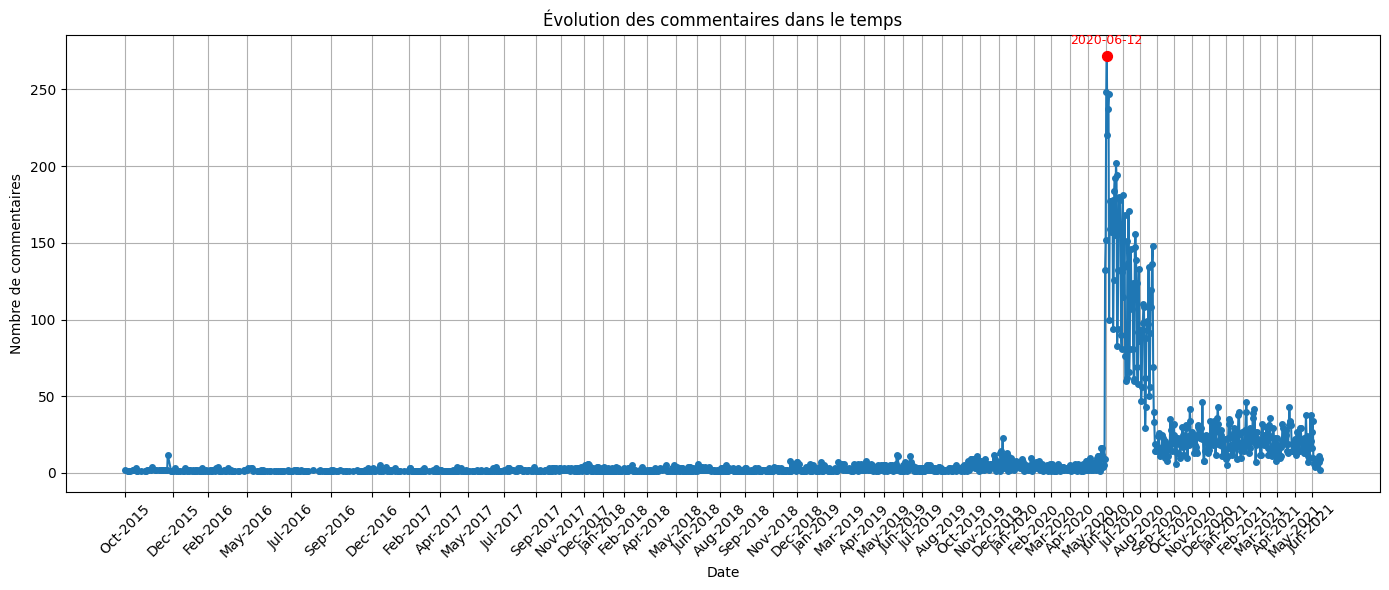

In [36]:
import matplotlib.pyplot as plt

# Agrégation par jour
agg = data_julie.groupby(data_julie['date_datetime'].dt.to_period('D')).size()
agg.index = agg.index.to_timestamp()  # convertir PeriodIndex en Timestamp

# Trouver le jour avec le maximum de commentaires
max_day = agg.idxmax()

# Graphique
plt.figure(figsize=(14,6))
plt.plot(agg.index, agg.values, marker='o', label='Commentaires', markersize=4)
plt.title("Évolution des commentaires dans le temps")
plt.xlabel("Date")
plt.ylabel("Nombre de commentaires")

# Mettre en avant le pic avec un point rouge
plt.scatter(max_day, agg.max(), color='red', zorder=5, s=50)  # s=taille du point
plt.text(max_day, agg.max()*1.02, max_day.strftime('%Y-%m-%d'), color='red',
         ha='center', va='bottom', fontsize=9)

# Améliorer les graduations sur l'axe X : afficher tous les mois
plt.xticks(agg.index[::30], [d.strftime('%b-%Y') for d in agg.index[::30]], rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


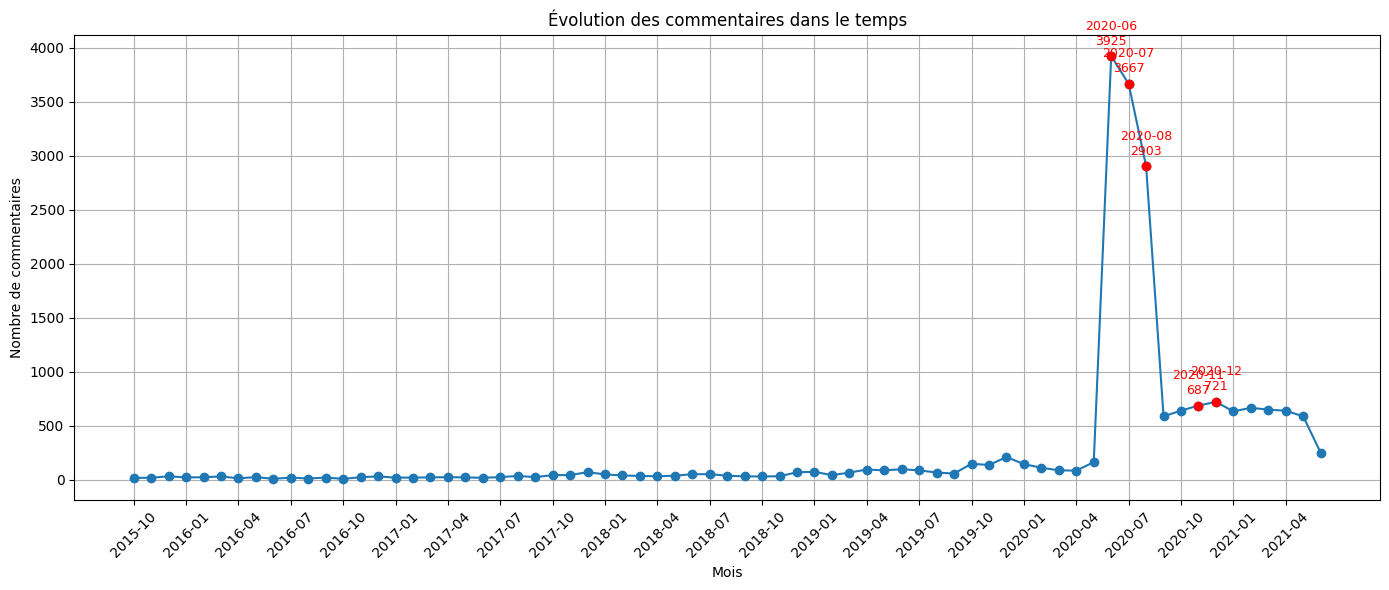

In [37]:

# Agrégation par mois
agg = data_julie.groupby(data_julie['date_datetime'].dt.to_period('M'))['Commentaire'].count()

# Top 5 mois
top5 = agg.sort_values(ascending=False).head(5)

# Figure plus large
plt.figure(figsize=(14,6))
plt.plot(agg.index.astype(str), agg.values, marker='o', label='Commentaires')
plt.title("Évolution des commentaires dans le temps")
plt.xlabel("Mois")
plt.ylabel("Nombre de commentaires")

# Amélioration des graduations
plt.xticks(agg.index.astype(str)[::3], rotation=45)  # afficher tous les 3 mois

# Mettre en avant les 5 pics
for month, count in top5.items():
    plt.scatter(str(month), count, color='red', zorder=5)
    plt.text(str(month), count + max(agg.values)*0.02, f"{month}\n{count}",
             color='red', ha='center', va='bottom', fontsize=9)

plt.grid(True)
plt.tight_layout()
plt.show()


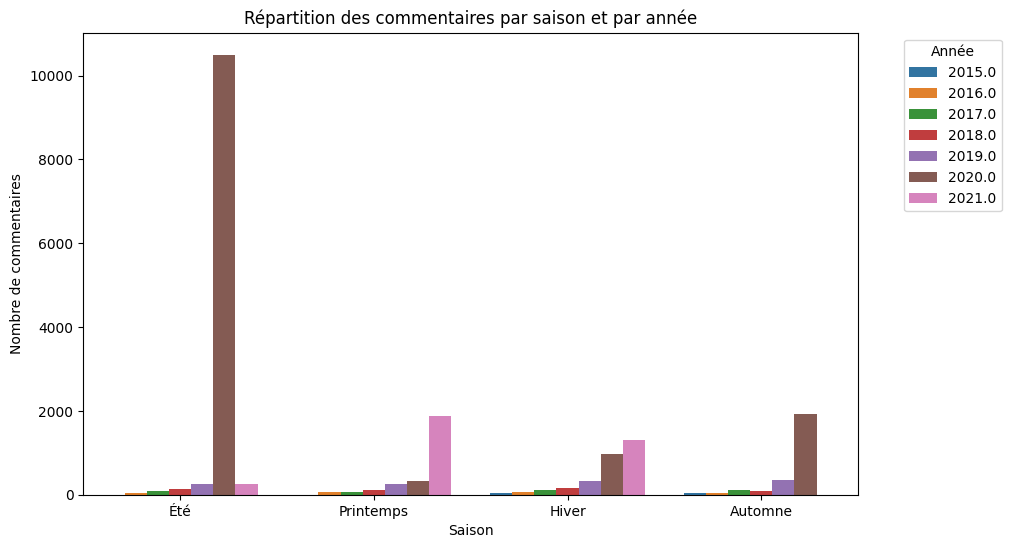

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(data=data_julie, x='Saison', hue='Année', palette='tab10')
plt.title("Répartition des commentaires par saison et par année")
plt.ylabel("Nombre de commentaires")
plt.xlabel("Saison")
plt.legend(title='Année', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [39]:
# Outlier

# Supposons que data a les colonnes ['date', 'commentaire']
daily_counts = data_julie.groupby('date_datetime').size().reset_index(name='nb_commentaires')

# Calcul du z-score pour détecter les outliers
daily_counts['z_score'] = (daily_counts['nb_commentaires'] - daily_counts['nb_commentaires'].mean()) / daily_counts['nb_commentaires'].std()

# Dates avec pic exceptionnel
outliers = daily_counts[daily_counts['z_score'] > 3]
print(outliers)


     date_datetime  nb_commentaires   z_score
1139    2020-06-09              132  3.879420
1140    2020-06-10              152  4.530629
1141    2020-06-11              248  7.656433
1142    2020-06-12              272  8.437884
1143    2020-06-13              220  6.744740
1144    2020-06-14              237  7.298268
1145    2020-06-15              247  7.623872
1147    2020-06-17              159  4.758552
1148    2020-06-18              177  5.344640
1149    2020-06-19              169  5.084156
1150    2020-06-20              157  4.693431
1151    2020-06-21              173  5.214398
1152    2020-06-22              178  5.377201
1154    2020-06-24              126  3.684057
1155    2020-06-25              184  5.572563
1156    2020-06-26              192  5.833047
1157    2020-06-27              155  4.628310
1158    2020-06-28              202  6.158652
1159    2020-06-29              194  5.898168
1162    2020-07-02              132  3.879420
1163    2020-07-03              17

In [40]:
daily_counts

,date_datetime,nb_commentaires,z_score
0,2015-10-02,2,-0.353440
1,2015-10-06,1,-0.386000
2,2015-10-07,1,-0.386000
3,2015-10-10,1,-0.386000
4,2015-10-15,2,-0.353440
...,...,...,...
1511,2021-06-16,8,-0.158077
1512,2021-06-17,7,-0.190638
1513,2021-06-18,11,-0.060396
1514,2021-06-19,9,-0.125517


In [41]:
print(daily_counts['nb_commentaires'].describe())

count    1516.000000
mean       12.854881
std        30.712099
min         1.000000
25%         1.000000
50%         3.000000
75%        10.000000
max       272.000000
Name: nb_commentaires, dtype: float64


In [42]:
total_comments = daily_counts['nb_commentaires'].sum()
print("Total comments:", total_comments)


Total comments: 19488


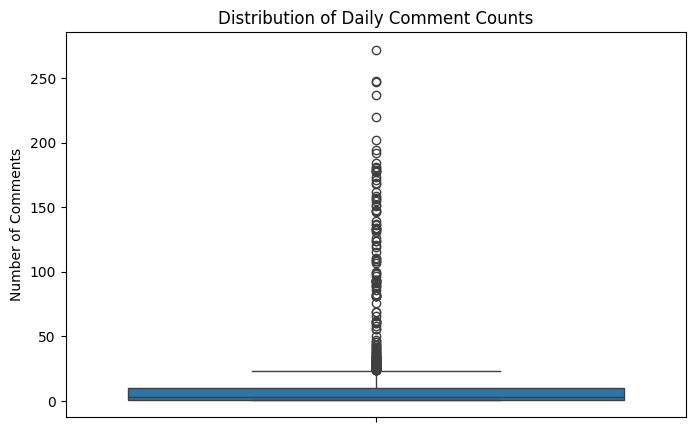

In [43]:
# COMMENTAIRES PAR JOUR

# Simple boxplot
plt.figure(figsize=(8,5))
sns.boxplot(y=daily_counts['nb_commentaires'])
plt.title("Distribution of Daily Comment Counts")
plt.ylabel("Number of Comments")
plt.show()


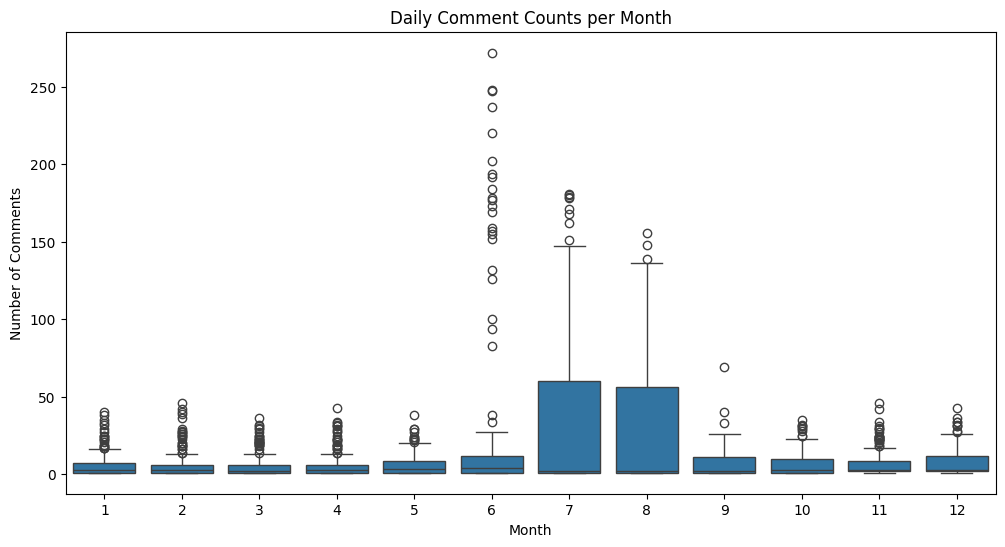

In [44]:
# par mois
daily_counts['month'] = daily_counts['date_datetime'].dt.month

plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='nb_commentaires', data=daily_counts)
plt.title("Daily Comment Counts per Month")
plt.xlabel("Month")
plt.ylabel("Number of Comments")
plt.show()


# Laurine - Présence de réponse en fonction de la note et de la longueur du commentaire + analyse textuelle

In [45]:
data_laurine = data.copy()

In [46]:
data_laurine["has_response"] = data_laurine["reponse"].notna()

## Réponse en fonction de la note

### Taux de réponses par note

In [47]:
response_rate = data_laurine.groupby("star")["has_response"].mean().reset_index()

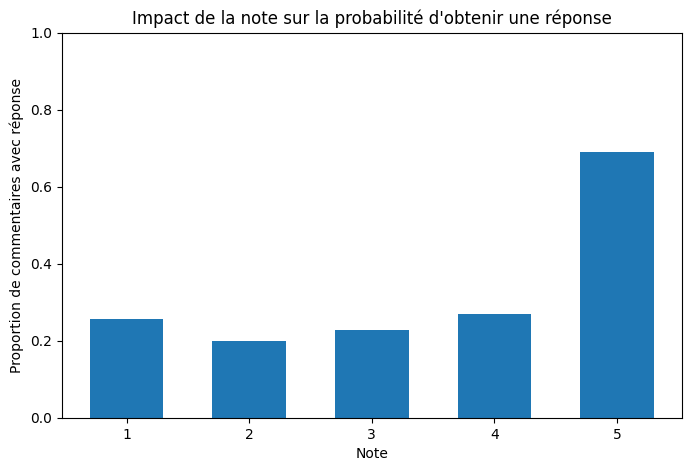

In [48]:
plt.figure(figsize=(8,5))
plt.bar(response_rate["star"], response_rate["has_response"], width=0.6)
plt.xlabel("Note")
plt.ylabel("Proportion de commentaires avec réponse")
plt.title("Impact de la note sur la probabilité d'obtenir une réponse")
plt.xticks(response_rate["star"])
plt.ylim(0, 1)
plt.show()

### Nombre de commentaires avec et sans réponses par note

In [49]:
counts = data_laurine.groupby(["star", "has_response"]).size().unstack(fill_value=0)

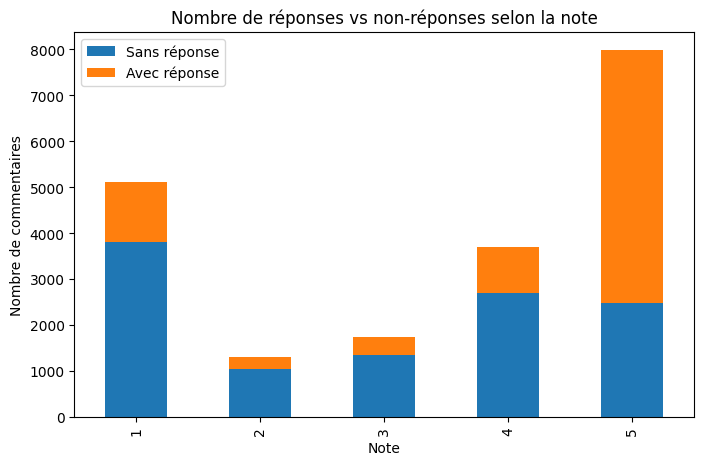

In [50]:
counts.plot(kind="bar", stacked=True, figsize=(8,5))
plt.xlabel("Note")
plt.ylabel("Nombre de commentaires")
plt.title("Nombre de réponses vs non-réponses selon la note")
plt.legend(["Sans réponse", "Avec réponse"])
plt.show()

## Réponse en fonction de la longueur du commentaire

In [51]:
data_laurine["comment_length"] = data_laurine["Commentaire"].fillna("").apply(len)

In [52]:
bins = [0, 50, 100, 200, 500, 1000, 2000, data_laurine["comment_length"].max()]
labels = ["<50", "50-100", "100-200", "200-500", "500-1000", "1000-2000", "2000+"]
data_laurine["length_bin"] = pd.cut(data_laurine["comment_length"], bins=bins, labels=labels, include_lowest=True)

### Taux de réponses en fonction de la longueur du commentaire

In [53]:
response_rate = data_laurine.groupby("length_bin")["has_response"].mean().reset_index()

/tmp/ipykernel_9167/763019232.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  response_rate = data_laurine.groupby("length_bin")["has_response"].mean().reset_index()


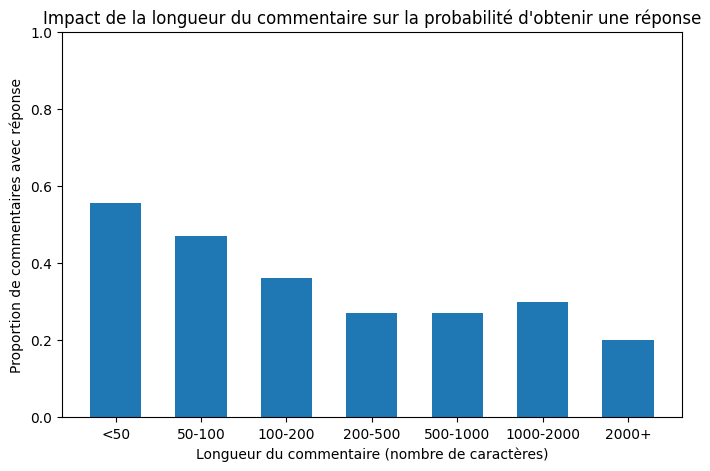

In [54]:
plt.figure(figsize=(8,5))
plt.bar(response_rate["length_bin"], response_rate["has_response"], width=0.6)
plt.xlabel("Longueur du commentaire (nombre de caractères)")
plt.ylabel("Proportion de commentaires avec réponse")
plt.title("Impact de la longueur du commentaire sur la probabilité d'obtenir une réponse")
plt.ylim(0, 1)
plt.show()

### Nombre de commentaires avec et sans réponses en fonction de la longueur du commentaire

In [55]:
counts = data_laurine.groupby(["length_bin", "has_response"]).size().unstack(fill_value=0)

/tmp/ipykernel_9167/653565909.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data_laurine.groupby(["length_bin", "has_response"]).size().unstack(fill_value=0)


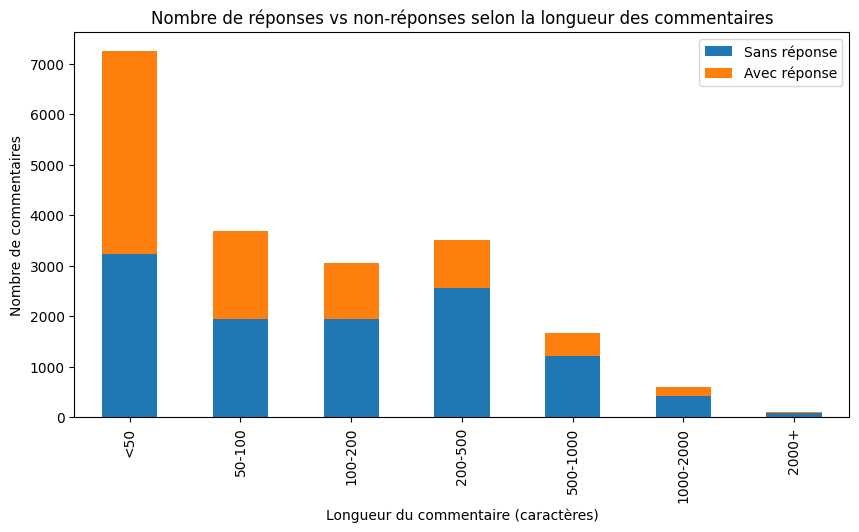

In [56]:
counts.plot(kind="bar", stacked=True, figsize=(10,5))
plt.xlabel("Longueur du commentaire (caractères)")
plt.ylabel("Nombre de commentaires")
plt.title("Nombre de réponses vs non-réponses selon la longueur des commentaires")
plt.legend(["Sans réponse", "Avec réponse"])
plt.show()

## Analyse textuelle

In [57]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_fr = set(stopwords.words("french"))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zàâçéèêëîïôûùüÿñæœ ]", " ", text)  # garder lettres et accents
    words = [w for w in text.split() if w not in stop_fr and len(w) > 2]
    return " ".join(words)

data_laurine["comment_clean"] = data_laurine["Commentaire"].fillna("").apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/laurine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Nombre de commentaires : 19817
Longueur moyenne (mots) : 19.201278759502593
Longueur moyenne (caractères) : 141.28656295625032


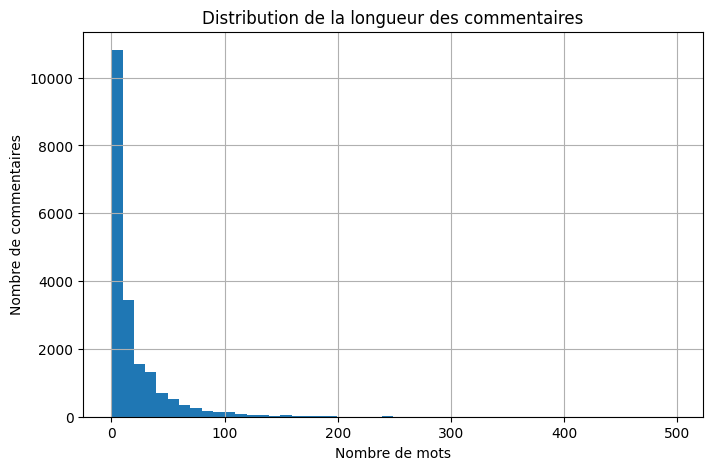

In [58]:
data_laurine["nb_mots"] = data_laurine["comment_clean"].apply(lambda x: len(x.split()))
data_laurine["nb_caract"] = data_laurine["comment_clean"].apply(len)

print("Nombre de commentaires :", data_laurine["comment_clean"].ne("").sum())
print("Longueur moyenne (mots) :", data_laurine["nb_mots"].mean())
print("Longueur moyenne (caractères) :", data_laurine["nb_caract"].mean())

data_laurine["nb_mots"].hist(bins=50, figsize=(8,5))
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre de commentaires")
plt.title("Distribution de la longueur des commentaires")
plt.show()

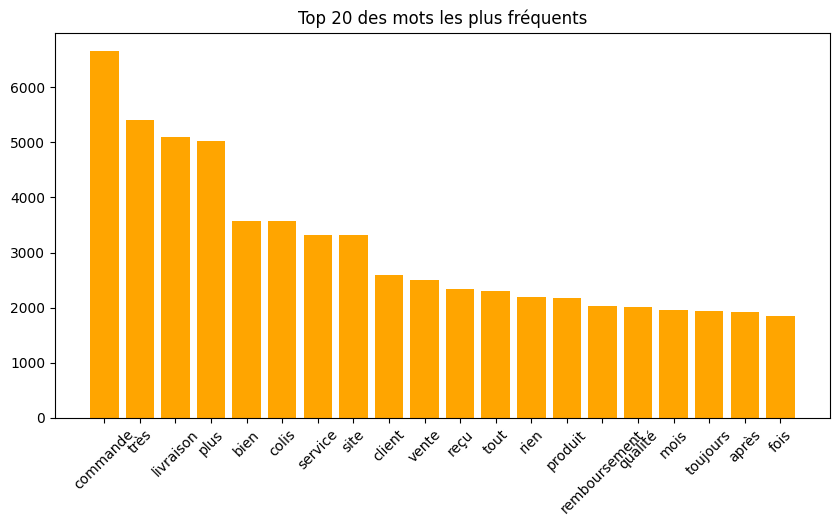

In [59]:
from collections import Counter

all_words = " ".join(data_laurine["comment_clean"]).split()
word_freq = Counter(all_words)

most_commons = word_freq.most_common(20)

plt.figure(figsize=(10,5))
plt.bar([m for m, _ in most_commons], [c for _, c in most_commons], color='orange')
plt.xticks(rotation=45)
plt.title("Top 20 des mots les plus fréquents")
plt.show()

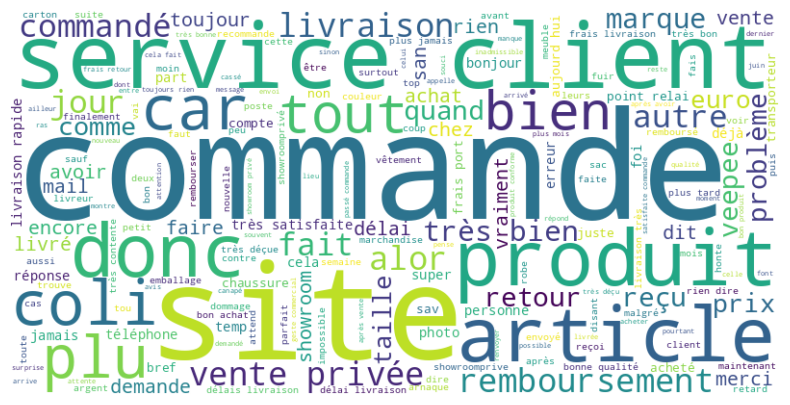

In [60]:
from wordcloud import WordCloud

wc = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

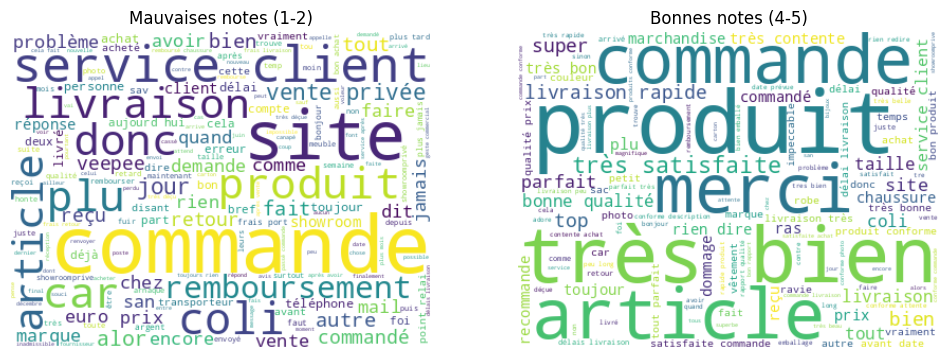

In [61]:
bad_comments = " ".join(data_laurine.loc[data_laurine["star"] <= 2, "comment_clean"])
good_comments = " ".join(data_laurine.loc[data_laurine["star"] >= 4, "comment_clean"])

wc_bad = WordCloud(width=400, height=300, background_color="white").generate(bad_comments)
wc_good = WordCloud(width=400, height=300, background_color="white").generate(good_comments)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(wc_bad, interpolation="bilinear")
plt.axis("off")
plt.title("Mauvaises notes (1-2)")

plt.subplot(1,2,2)
plt.imshow(wc_good, interpolation="bilinear")
plt.axis("off")
plt.title("Bonnes notes (4-5)")
plt.show()

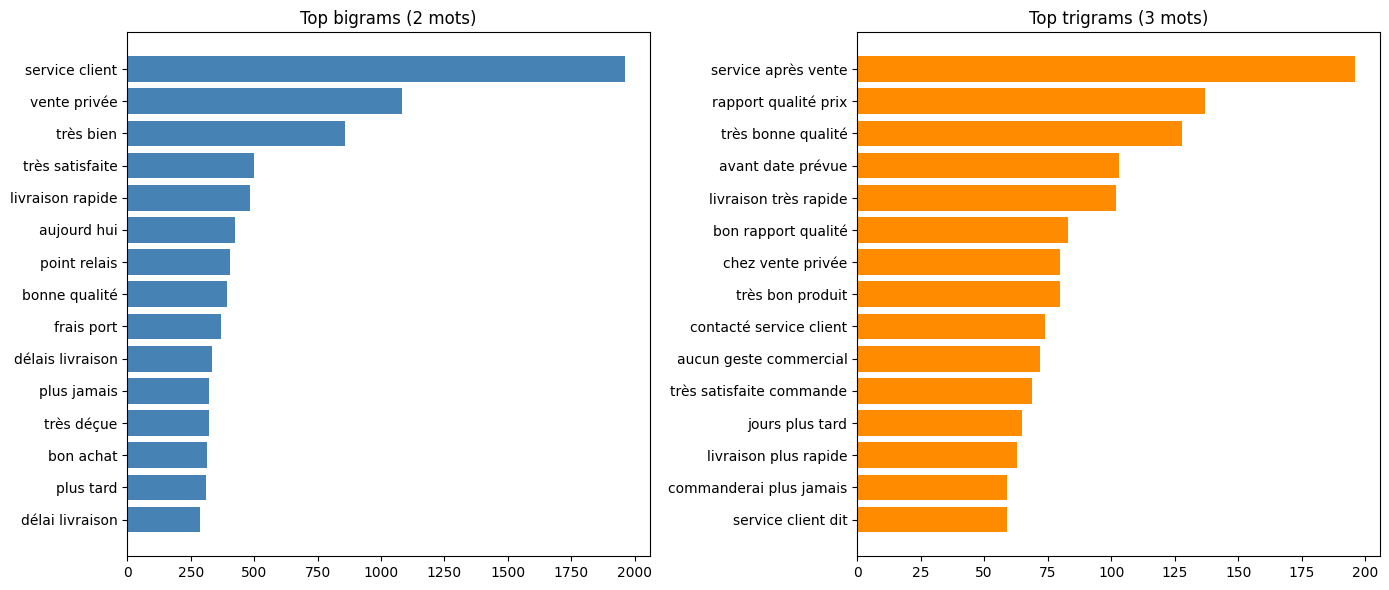

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# --- Extraction des bigrams et trigrams ---
def get_top_ngrams(corpus, ngram_range=(2,2), n=20):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(corpus)
    freqs = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])
    sorted_ngrams = sorted(freqs, key=lambda x: x[1], reverse=True)[:n]
    return pd.DataFrame(sorted_ngrams, columns=["ngram", "count"])

# Bigrams
top_bigrams = get_top_ngrams(data_laurine["comment_clean"], ngram_range=(2,2), n=15)

# Trigrams
top_trigrams = get_top_ngrams(data_laurine["comment_clean"], ngram_range=(3,3), n=15)

# --- Visualisation ---
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Bigrams
axes[0].barh(top_bigrams["ngram"], top_bigrams["count"], color="steelblue")
axes[0].set_title("Top bigrams (2 mots)")
axes[0].invert_yaxis()

# Trigrams
axes[1].barh(top_trigrams["ngram"], top_trigrams["count"], color="darkorange")
axes[1].set_title("Top trigrams (3 mots)")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

In [65]:
import fasttext

model = fasttext.load_model('../models/language_detection/lid.176.ftz')
texts = data_laurine["comment_clean"].tolist()

labels, probs = model.predict(texts, k=3)

def get_label(lbls, probs, idx):
    if idx < len(lbls):
        return lbls[idx].replace("__label__", ""), float(probs[idx])
    else:
        return None, 0.0

lang_1, prob_1 = zip(*[get_label(lbls, pb, 0) for lbls, pb in zip(labels, probs)])
lang_2, prob_2 = zip(*[get_label(lbls, pb, 1) for lbls, pb in zip(labels, probs)])
lang_3, prob_3 = zip(*[get_label(lbls, pb, 2) for lbls, pb in zip(labels, probs)])

data_laurine["lang_1"], data_laurine["prob_1"] = lang_1, prob_1
data_laurine["lang_2"], data_laurine["prob_2"] = lang_2, prob_2
data_laurine["lang_3"], data_laurine["prob_3"] = lang_3, prob_3

# Nouvelles colonnes pour regrouper fr / pas fr
data_laurine["lang_1_grouped"] = data_laurine["lang_1"].apply(lambda x: "fr" if x == "fr" else "Autres")
data_laurine["lang_2_grouped"] = data_laurine["lang_2"].apply(lambda x: "fr" if x == "fr" else "Autres")

# data_laurine.to_excel("../outputs/detect_lang.xlsx", index=False)

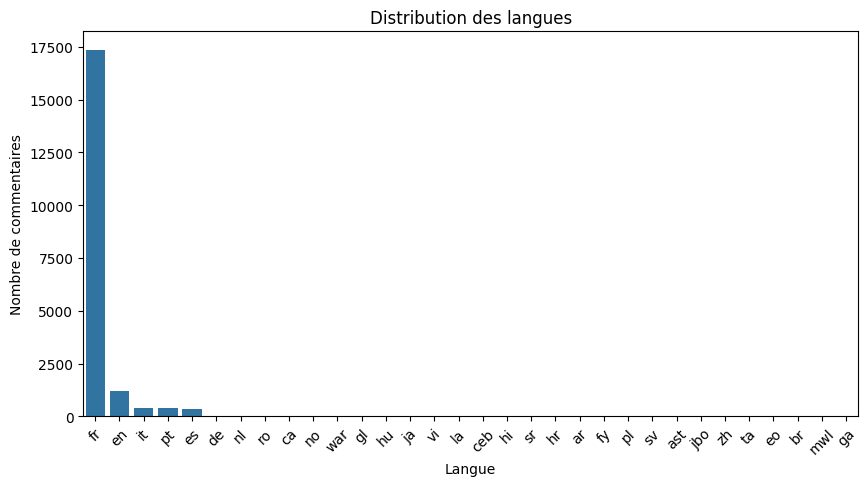

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(x="lang_1", data=data_laurine, order=data_laurine["lang_1"].value_counts().index)
plt.title("Distribution des langues")
plt.xlabel("Langue")
plt.ylabel("Nombre de commentaires")
plt.xticks(rotation=45)
plt.show()

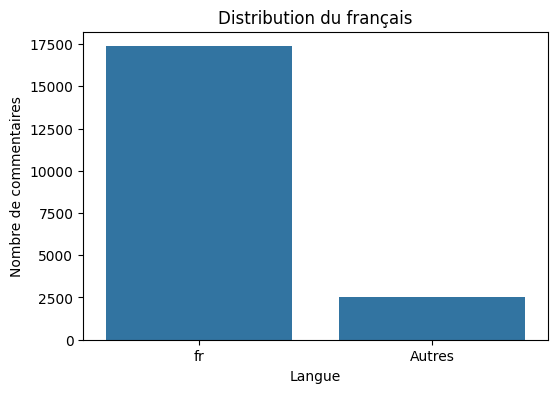

In [67]:
plt.figure(figsize=(6,4))
sns.countplot(x="lang_1_grouped", data=data_laurine, order=["fr", "Autres"])
plt.title("Distribution du français")
plt.xlabel("Langue")
plt.ylabel("Nombre de commentaires")
plt.show()

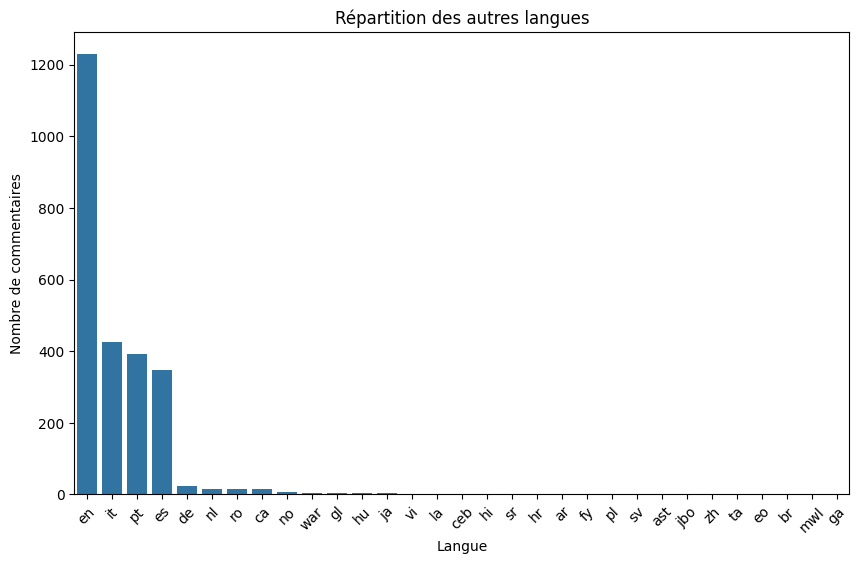

In [68]:
df_non_fr = data_laurine[data_laurine["lang_1"] != "fr"]
lang_counts = df_non_fr["lang_1"].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=lang_counts.index, y=lang_counts.values)
plt.title("Répartition des autres langues")
plt.xlabel("Langue")
plt.ylabel("Nombre de commentaires")
plt.xticks(rotation=45)
plt.show()

# Quentin - Longueur du commentaire vis-à-vis de la note

In [69]:
data_quentin = data.copy()

In [70]:
data_quentin = data_quentin.dropna(subset=["Commentaire"])
data_quentin["longueur"] = data_quentin["Commentaire"].str.len()

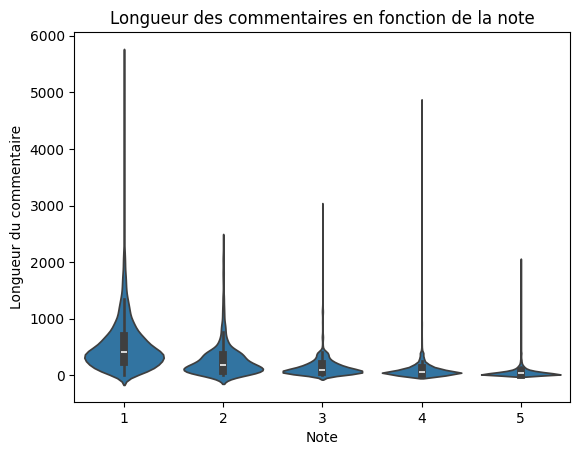

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.violinplot(x="star", y="longueur", data=data_quentin, inner="box", density_norm="width")
plt.xlabel("Note")
plt.ylabel("Longueur du commentaire")
plt.title("Longueur des commentaires en fonction de la note")
plt.show()

# Les notes 1 et 2 ont une distribution de commentaire beaucoup plus étendue, certains commentaires
# A partir de la note 3, les commentaires sont nettement plus courts

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/laurine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


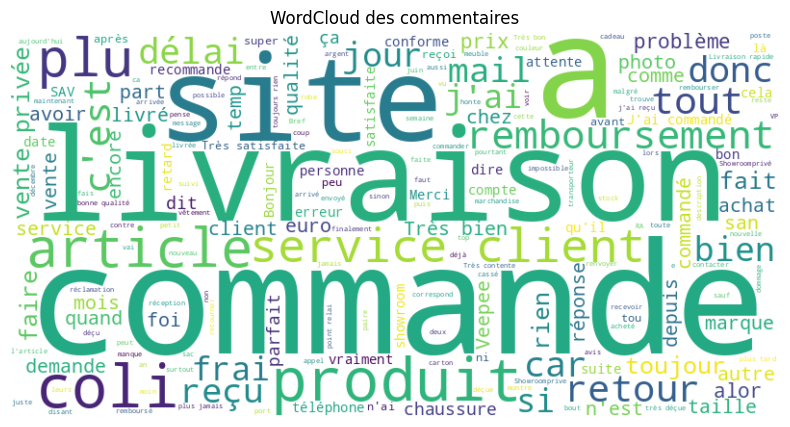

In [72]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("french"))

# on concatène tous les commentaires
text = " ".join(data_quentin["Commentaire"].dropna().astype(str))

# on instancie notre wordcloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="viridis",
    max_words=200,
    stopwords=stop_words
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud des commentaires")
plt.show()

company
ShowRoom    16823
VeePee       3040
Name: count, dtype: int64
company
ShowRoom    0.846952
VeePee      0.153048
Name: proportion, dtype: float64


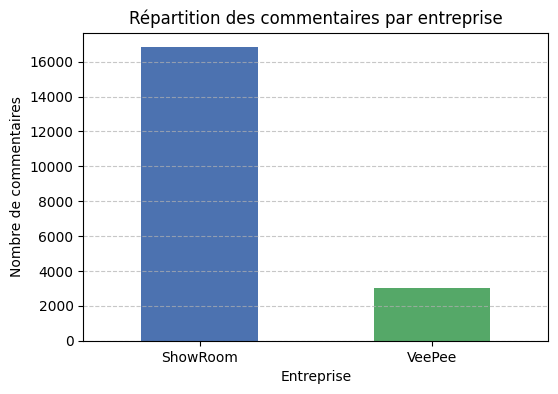

In [73]:
company_counts = data["company"].value_counts()
print(company_counts)
print(data["company"].value_counts(normalize=True))
plt.figure(figsize=(6,4))
company_counts.plot(kind='bar', color=['#4C72B0', '#55A868'])
plt.title("Répartition des commentaires par entreprise")
plt.xlabel("Entreprise")
plt.ylabel("Nombre de commentaires")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

company
ShowRoom    3.756821
VeePee      1.480263
Name: star, dtype: float64


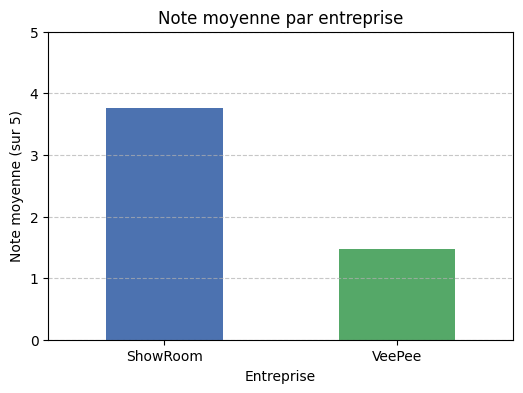

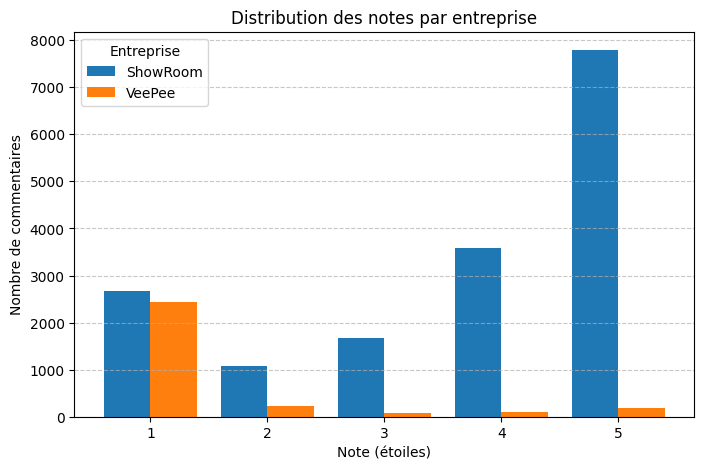

In [74]:
# Calcul de la moyenne des notes par entreprise
mean_stars = data.groupby("company")["star"].mean().sort_values(ascending=False)

print(mean_stars)

plt.figure(figsize=(6,4))
mean_stars.plot(kind='bar', color=['#4C72B0', '#55A868'])
plt.title("Note moyenne par entreprise")
plt.xlabel("Entreprise")
plt.ylabel("Note moyenne (sur 5)")
plt.ylim(0, 5)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Comptage du nombre d'avis par note et par entreprise
rating_distribution = data.groupby(["company", "star"]).size().unstack(fill_value=0)

rating_distribution.T.plot(kind='bar', figsize=(8,5), width=0.8)

plt.title("Distribution des notes par entreprise")
plt.xlabel("Note (étoiles)")
plt.ylabel("Nombre de commentaires")
plt.xticks(rotation=0)
plt.legend(title="Entreprise")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/laurine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


               ngram  count
0     service client   1962
1       vente privée   1083
2          très bien    858
3    très satisfaite    499
4   livraison rapide    484
5        aujourd hui    426
6       point relais    406
7      bonne qualité    392
8         frais port    369
9   délais livraison    335
10        très déçue    321
11       plus jamais    321
12         bon achat    313
13         plus tard    310
14   délai livraison    287
15         rien dire    276
16     très contente    261
17     toujours rien    249
18   frais livraison    241
19    livraison très    241


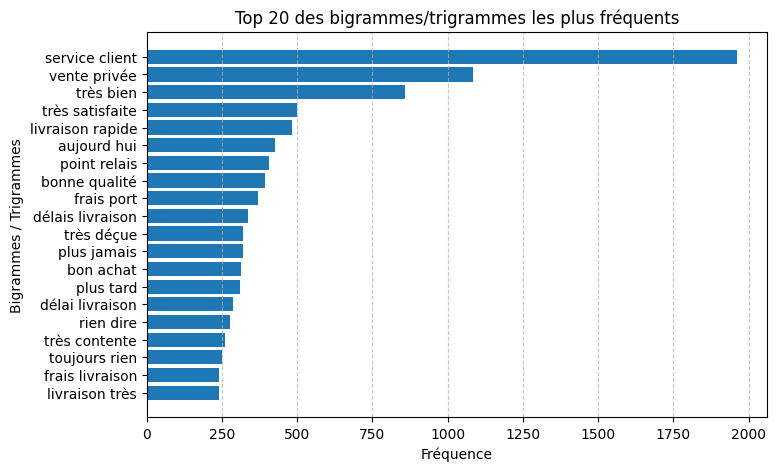

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("french"))

# Nettoyage simple des textes
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
    else:
        text = ""
    return text

data_quentin["clean_comment"] = data_quentin["Commentaire"].apply(clean_text)

from collections import Counter

# Initialisation du vecteur de n-grammes
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words=list(stop_words))  # 2 = bigrammes, 3 = trigrammes
X = vectorizer.fit_transform(data_quentin["clean_comment"])

# Comptage global
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Top 20
top_ngrams = pd.DataFrame(words_freq[:20], columns=["ngram", "count"])
print(top_ngrams)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(top_ngrams["ngram"][::-1], top_ngrams["count"][::-1])
plt.title("Top 20 des bigrammes/trigrammes les plus fréquents")
plt.xlabel("Fréquence")
plt.ylabel("Bigrammes / Trigrammes")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

KeyError: 'clean_comment'

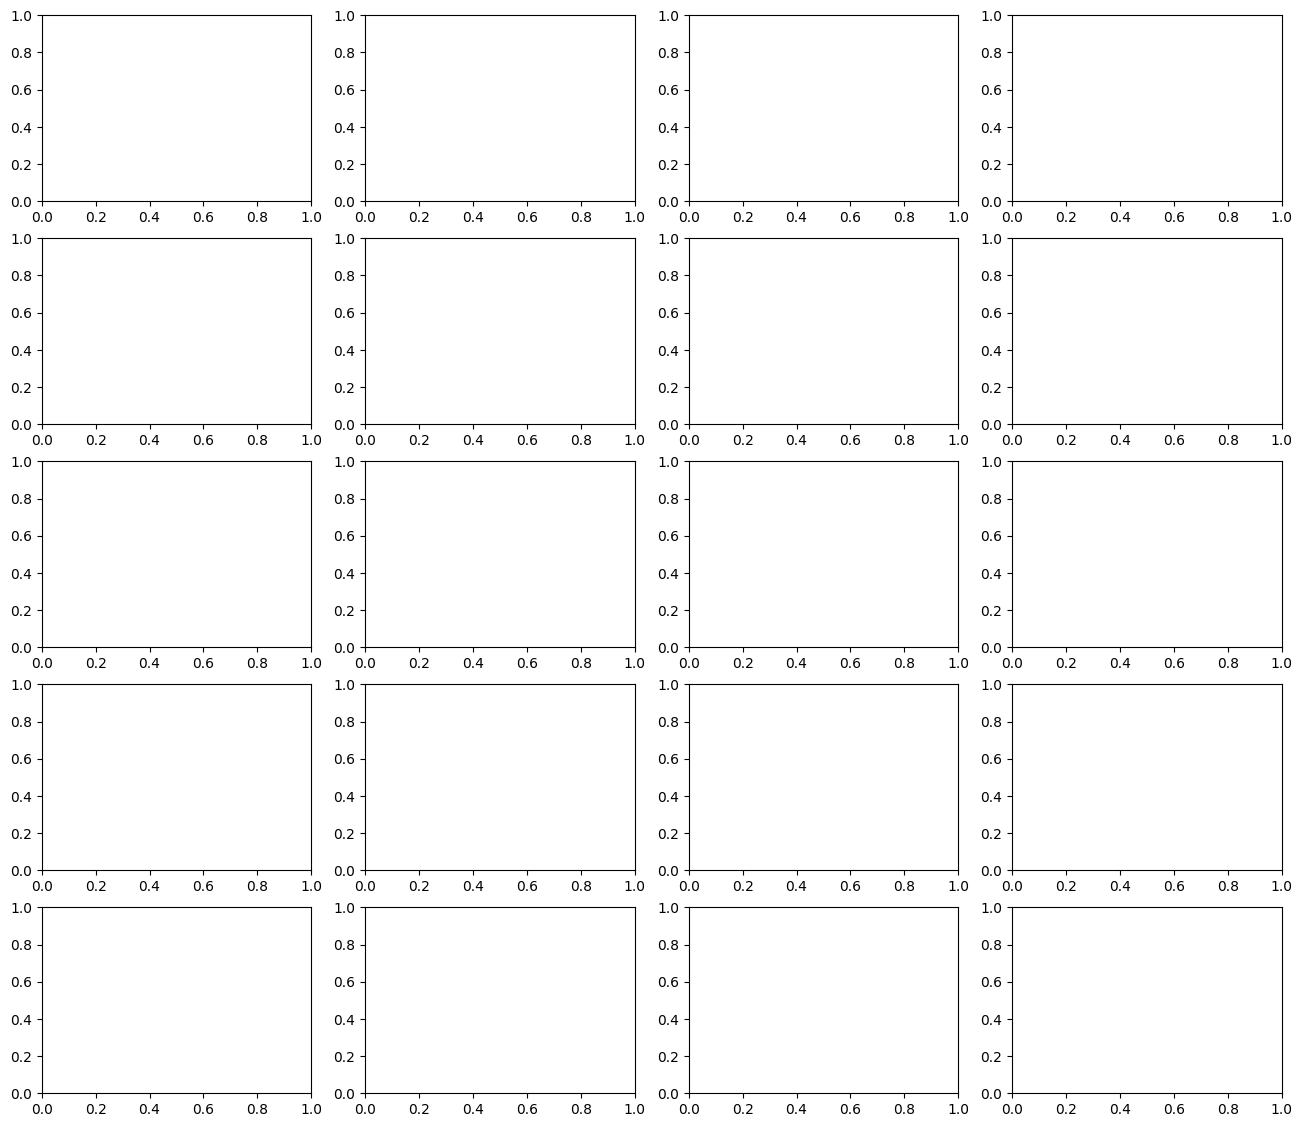

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns  # pour un rendu plus lisible
import pandas as pd

# On garde les 20 bigrammes/trigrammes les plus fréquents
top_ngrams_list = top_ngrams["ngram"].tolist()

# Création d'une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(5, 4, figsize=(16, 14))  # 20 graphiques = 5x4
axes = axes.flatten()

for i, ngram in enumerate(top_ngrams_list):
    # Filtrer les commentaires contenant le bigramme
    mask = data["clean_comment"].str.contains(ngram)
    subset = data[mask]

    # Distribution des notes
    star_counts = subset["star"].value_counts().sort_index()

    # Graphique
    sns.barplot(
        x=star_counts.index,
        y=star_counts.values,
        ax=axes[i],
        color="#4C72B0"
    )

    axes[i].set_title(ngram, fontsize=10)
    axes[i].set_xlabel("Note")
    axes[i].set_ylabel("Nb d'avis")
    axes[i].set_ylim(0, star_counts.max() * 1.2)
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

# Ajustement des espacements
plt.suptitle("Répartition des notes selon les 20 bigrammes/trigrammes les plus fréquents", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
